In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
from matplotlib import table

from matplotlib import colormaps
from matplotlib.colors import Normalize

from matplotlib.widgets import Button, Slider

from config import config

In [2]:
perf_path_prefix = config["perf_path_prefix"]
sample_frequency = config["sample_frequency"]

metrics = {
    "maxmem":[],
    "walltime":[],
    "idlepercent":[],
    "userid":[],
    "groupid":[]
}
for jobid in os.listdir(perf_path_prefix):
    for fn in os.listdir(perf_path_prefix+"/"+jobid):
        fullname = perf_path_prefix+"/"+jobid+"/"+fn

        with open(fullname, "r") as f:
            jobperf = yaml.safe_load(f)

            perflist = jobperf["metrics"]

            # find the largest memory used
            maxmem = 0.0
            idle_cnt = 0
            
            for i in range(len(perflist)):
                memused, numprocs = perflist[i].split(":")[6:10:3]
                if float(memused) > maxmem:
                    maxmem = float(memused)
                if int(numprocs) == 0:
                    idle_cnt = idle_cnt+1

            metrics["walltime"].append(len(perflist)*sample_frequency/3600)
            metrics["maxmem"].append(maxmem/1024)
            metrics["idlepercent"].append(float(idle_cnt)/float(len(perflist)))
            metrics["userid"].append(jobperf["userid"])
            metrics["groupid"].append(jobperf["groupid"])

In [3]:
x = metrics["walltime"]
y = metrics["maxmem"]

In [4]:
%matplotlib widget

In [ ]:
#sizes = [0.2] * len(x)
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.set_aspect(1/2)
#plt.scatter(x, y, s=sizes)
#plt.xlabel("Walltime (hour)")
#plt.ylabel("VRAM (GiB)")
#plt.show()

In [ ]:
fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.hist(x, bins=8)
ax2 = fig.add_subplot(212)
ax2.hist(y, bins=16)
plt.show()

In [ ]:
fig = plt.figure(2)
ax = fig.add_subplot()
hist, xbins, ybins, im  = ax.hist2d(x, y, bins=(8, 16), cmap=mpl.colormaps["Blues"])
ax.set_aspect(1/2)
bin_max = 0
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if hist.T[i,j] > bin_max:
            bin_max = hist.T[i,j]

        if hist.T[i, j] < 200:
            ax.text(xbins[j]+0.5,ybins[i]+0.5, int(hist.T[i,j]), 
                color="black", ha="left", va="center", fontsize="small")
        else:
            ax.text(xbins[j]+0.5,ybins[i]+0.5, int(hist.T[i,j]), 
                color="w", ha="left", va="center", fontsize="small")
bin_max = int(bin_max)
print(bin_max)
xticks = np.arange(0, 48, 6)
xlabels = [x for x in xticks]
ax.set_xticks(xticks, labels=xlabels)

# add colormap legend
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax = plt.axes((0.85, 0.1, 0.075, 0.8))
#plt.colorbar(cax=cax)
plt.show()

In [ ]:
fig = plt.figure(3)
fig.clear()
ax = fig.add_subplot(projection='3d')
nbinx = 8
nbiny = 16
hist, xedges, yedges = np.histogram2d(x, y, bins=(nbinx, nbiny))
xpos, ypos = np.meshgrid(xedges[:-1] + 2.25, yedges[:-1] + .25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

#print(xpos, ypos)

dx = 2.0 * np.ones_like(zpos)
dy = 3.5 * np.ones_like(zpos)
dz = hist.ravel()

cmap = colormaps.get_cmap('Blues')
norm = Normalize(vmin=min(dz), vmax=max(dz))
colors = cmap(norm(dz))

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=1.0, color=colors)
#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.8)

xticks = np.arange(0, 48, 6)
xlabels = [x for x in xticks]
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

for i in range(nbiny):
    for j in range(nbinx):
        # adjust text height based on bar height
        if hist.T[i,j] > 150:
            ax.text(xedges[j]+dx, yedges[i]+dy, hist.T[i,j]-20, int(hist.T[i,j]),
                color="w", ha="left", va="center", fontsize="x-small")
        else:
            ax.text(xedges[j]+dx, yedges[i]+dy, hist.T[i,j]+10, int(hist.T[i,j]),
                color="black", ha="left", va="center", fontsize="x-small")

plt.show()

In [5]:
userids, jobcounts = np.unique(metrics["userid"], return_counts=True)
print(userids)
print(jobcounts)
#df = pandas.DataFrame({"userid": userids})
#print(df)

['bw532' 'cl2575' 'ddz5' 'df669' 'dfl32' 'dy274' 'fx38' 'gkl7' 'hs925'
 'ihq2' 'jc3999' 'jz875' 'lhl27' 'ma2393' 'meb266' 'mib37' 'mt2286'
 'my458' 'nhb25' 'pl543' 'qm39' 'rw686' 'rx56' 'sg2597' 'sh2748' 'sr2464'
 'th748' 'tl688' 'wcp27' 'wq44' 'xh338' 'yz2375' 'yz979' 'zw346']
[  3  42  27  20 202 881   2  11  38   4   5  82   5 115  16  37  90  91
  41  11  98  12  93 349 239  34  51  61 315  27  32   1  70  14]


In [ ]:
print(len(userids))
print(col_size-len(userids)%col_size)
pad_userids = np.append(userids, ['']*(col_size-len(userids)%col_size))
print(pad_userids)
cell_text = []
for row in range(len(row_labels)):
    offset = row * col_size
    cell_text.append(['%s' % userid for userid in pad_userids[offset:offset+col_size]])
print(cell_text)

[ 0.08333333  6.08333333 12.08333333 18.08333333 24.08333333 30.08333333
 36.08333333 42.08333333 48.08333333]
[1.22680664e-02 5.01133347e+00 1.00103989e+01 1.50094643e+01
 2.00085297e+01 2.50075951e+01 3.00066605e+01 3.50057259e+01
 4.00047913e+01 4.50038567e+01 5.00029221e+01 5.50019875e+01
 6.00010529e+01 6.50001183e+01 6.99991837e+01 7.49982491e+01
 7.99973145e+01]
791.0
[ 0.08333333  6.08333333 12.08333333 18.08333333 24.08333333 30.08333333
 36.08333333 42.08333333 48.08333333]
[1.22680664e-02 5.01133347e+00 1.00103989e+01 1.50094643e+01
 2.00085297e+01 2.50075951e+01 3.00066605e+01 3.50057259e+01
 4.00047913e+01 4.50038567e+01 5.00029221e+01 5.50019875e+01
 6.00010529e+01 6.50001183e+01 6.99991837e+01 7.49982491e+01
 7.99973145e+01]


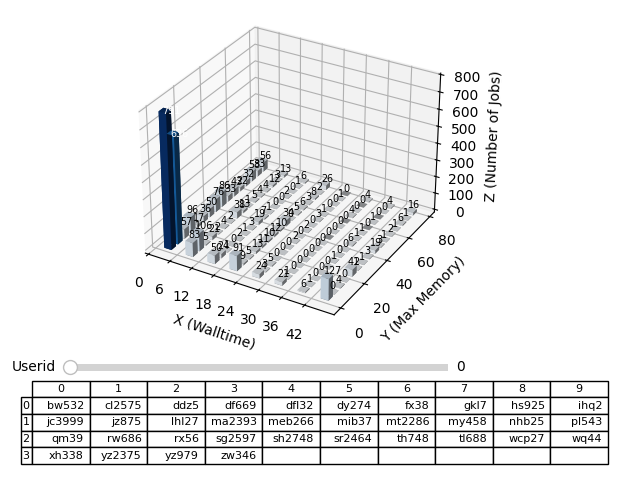

In [6]:
fig = plt.figure(4)
fig.clear()

nbinx = 8
nbiny = 16

bar3d_ax = fig.add_subplot(projection='3d')
bar3d_ax.set_position([0.0,0.3, 0.9, 0.7])
bar3d_ax.cla()

def find_binmax(xbins, ybins, hist):
    bin_max = 0
    for i in range(ybins):
        for j in range(xbins):
            if hist.T[i,j] > bin_max:
                bin_max = hist.T[i,j]
    return bin_max

def user_xy(uid, userids, x, y, metrix_uids): 
    userid = userids[uid]
    user_x = x
    user_y = y
    for i in range(len(x)):
        if not userid == metrix_uids[i]:
            user_x[i] = 0
            user_y[i] = 0         
    return user_x, user_y

# The function to be called anytime a slider's value changes
#def update(uid, bar3d_ax, nbinx, nbiny, xedges, yedges, dx, dy, hist):
#    line.set_ydata(f(slider.uid))
#    fig.canvas.draw_idle()

def add_text(bar3d_ax, nbinx, nbiny, xedges, yedges, dx, dy, hist):
    for i in range(nbiny):
        for j in range(nbinx):
            # adjust text height based on bar height
            if hist.T[i,j] > 150:
                bar3d_ax.text(xedges[j]+dx, yedges[i]+dy, hist.T[i,j]-20, int(hist.T[i,j]),
                     color="w", ha="left", va="center", fontsize="x-small")
            else:
                bar3d_ax.text(xedges[j]+dx, yedges[i]+dy, hist.T[i,j]+10, int(hist.T[i,j]),
                    color="black", ha="left", va="center", fontsize="x-small")

def update_bar3d():
    bar3d_ax.cla()
    bar3d_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=1.0, color=colors)

#hist, xedges, yedges = np.histogram2d(user_x, user_y, bins=(nbinx, nbiny))


xedges = []
yedges = []
hist, xedges, yedges = np.histogram2d(x, y, bins=(nbinx, nbiny))
print(xedges)
print(yedges)

bin_max = find_binmax(nbinx, nbiny, hist)
print(bin_max)
xpos, ypos = np.meshgrid(xedges[:-1] + 2.25, yedges[:-1] + .25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

#print(xpos, ypos)

dx = 2.0 * np.ones_like(zpos)
dy = 3.5 * np.ones_like(zpos)
dz = hist.ravel()

cmap = colormaps.get_cmap('Blues')
norm = Normalize(vmin=min(dz), vmax=bin_max)
colors = cmap(norm(dz))

bar3d_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=1.0, color=colors)
#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.8)

xticks = np.arange(0, 48, int(48/nbinx))
xlabels = [x for x in xticks]
bar3d_ax.set_xticks(xticks, labels=xlabels)
#yticks = np.arange(0, 80, int(80/nbiny))
#ylabels = [x for x in yticks]
#bar3d_ax.set_yticks(yticks, labels=ylabels)
#zticks = np.arange(0, 800, 100)
#zlabels = [x for x in zticks]
#bar3d_ax.set_zticks(zticks, labels=zlabels)


bar3d_ax.set_xlabel('X (Walltime)')
bar3d_ax.set_ylabel('Y (Max Memory)')
bar3d_ax.set_zlabel('Z (Number of Jobs)')

add_text(bar3d_ax, nbinx, nbiny, xedges, yedges, dx, dy, hist)

ax_slider = fig.add_axes([0.1, 0.22, 0.6, 0.03])
user_slider = Slider(
    ax=ax_slider,
    label="Userid",
    valmin=0,
    valmax=len(userids)-1,
    valfmt="%i"
#    valinit=init_userid,
)

user_x, user_y = user_xy(5,userids,x,y,metrics["userid"])
print(xedges)
print(yedges)
#print(user_x)
#print(user_y)
#hist2, xedges, yedges, = np.histogram2d(user_x, user_y, bins=(xedges, yedges))
#dz = hist2.ravel()
#bar3d_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=1.0, color="Red")
#ax_slider.on_changed(update)



#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
userid_ax = fig.add_axes([0.05, 0.02, 0.9, 0.2])
userid_ax.axis('off')
col_size = 10
# pad userids so that its length is a multiple of col_size
pad_userids = np.append(userids, ['']*(col_size-len(userids)%col_size))
column_labels = list(x for x in range(col_size))
row_labels = [ x for x in range(int(len(pad_userids)/10)) ]
cell_text = []
for row in range(len(row_labels)):
    offset = row * col_size
    cell_text.append(['%s' % userid for userid in pad_userids[offset:offset+col_size]])
  
table.table(userid_ax, 
            cellText=cell_text,
            rowLabels=row_labels,
            colLabels=column_labels,
            loc='center')
"""
plt.table(cellText=cell_text,
          rowLabels=row_labels,
          colLabels=column_labels,
          loc='bottom')
""" 
#plt.subplots_adjust(left=0.2, bottom=0.1)
plt.show()

In [ ]:
exclude_lst = ['dy274']
x_plot = []
y_plot = []
x_exclude = []
y_exclude = []
for i in range(len(x)):
    if metrics["userid"][i] not in exclude_lst:
        x_plot.append(x[i])
        y_plot.append(y[i])
    else:
        x_exclude.append(x[i])
        y_exclude.append(y[i])

print(len(x_plot))

In [ ]:
sizes = [0.2] * len(x)
plt.scatter(x, y, s=sizes, color = 'red')
#sizes2 = [0.2] * len(x_plot)
#plt.scatter(x_plot, y_plot, s=sizes2, color = 'black')
sizes3 = [0.2] * len(x_exclude)
plt.scatter(x_exclude, y_exclude, s=sizes3, color = 'black')
plt.xlabel("Walltime (hour)")
plt.ylabel("VRAM (GiB)")
plt.show()

In [ ]:
for i in range(len(userids)):
    print(userids[i]+":"+str(jobcounts[i])+", ",end=" ")

In [ ]:
sorted(zip(jobcounts, userids))

In [ ]:
sorted_u = sorted(zip(jobcounts, userids))
uj_s = list(zip(*sorted_u))[0]
u_s = list(zip(*sorted_u))[1]
print(_)
print(uj_s)
print(u_s)
plt.bar(u_s[:], uj_s[:])
plt.xticks(rotation=90)
plt.show()

In [ ]:
groupids, groupcounts = np.unique(metrics["groupid"], return_counts=True)
print(groupids)
print(groupcounts)

In [ ]:
for i in range(len(groupids)):
    print(groupids[i]+":"+str(groupcounts[i])+", ",end=" ")

gj_s = [ _[0] for _ in sorted(zip(groupcounts, groupids)) ]
g_s = [ _[1] for _ in sorted(zip(groupcounts, groupids)) ]
plt.bar(g_s, gj_s)
plt.xticks(rotation=90)
plt.show()

In [ ]:
%matplotlib widget

In [ ]:
z = np.array(metrics["userid"])
z_axis = []
for _ in z:
    z_axis.append(np.where(userids == _ )[0][0])

#print(z_axis)

In [ ]:
# z is the index of 'userid' in the list "values" + 1
z = metrics["userid"]  
#z_axis = [ np.where(x==z) ]
#print(z_axis)
print(len(x))
print(len(y))
print(len(z))
fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z_axis, s=2)
ax.set_zlabel("user")
ax.set_xlabel("Walltime (hour)")
ax.set_ylabel("VRAM (GiB)")
#z_ticks_labels = ['bw532','ddz5','df669','dfl32','dy274','fx38','hs925','jc3999','jz875',
# 'lhl27','ma2393','mt2286','my458','nhb25','pl543','qm39','rw686','rx56',
# 'sg2597','sh2748','sr2464','th748','tl688','wcp27','wq44','xh338','yz979',
# 'zw346']
#ax.set_zticks(z_axis)
#ax.set_zticklabels(z_ticks_labels, rotation='horizontal')
plt.show()